**WINE QUALITY PREDICTION BY SYAM KRISHNA REDDY PULAGAM**


**IMPORTING LIBRARIES**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

READING THE DATASET AND EXPLORING THE DATASET

In [42]:
dataset=pd.read_csv("winequality.csv")
dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [43]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


AS TYPE COLUMN IS OF OBJECT TYPE, WE CONVERT IT TO INT64 TYPE

In [45]:
dataset['type'].dtypes

dtype('O')

In [46]:
dataset.replace({'white': 1, 'red': 0}, inplace=True)

KNOWING MORE ABOUT THE DATASET

In [47]:
dataset.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


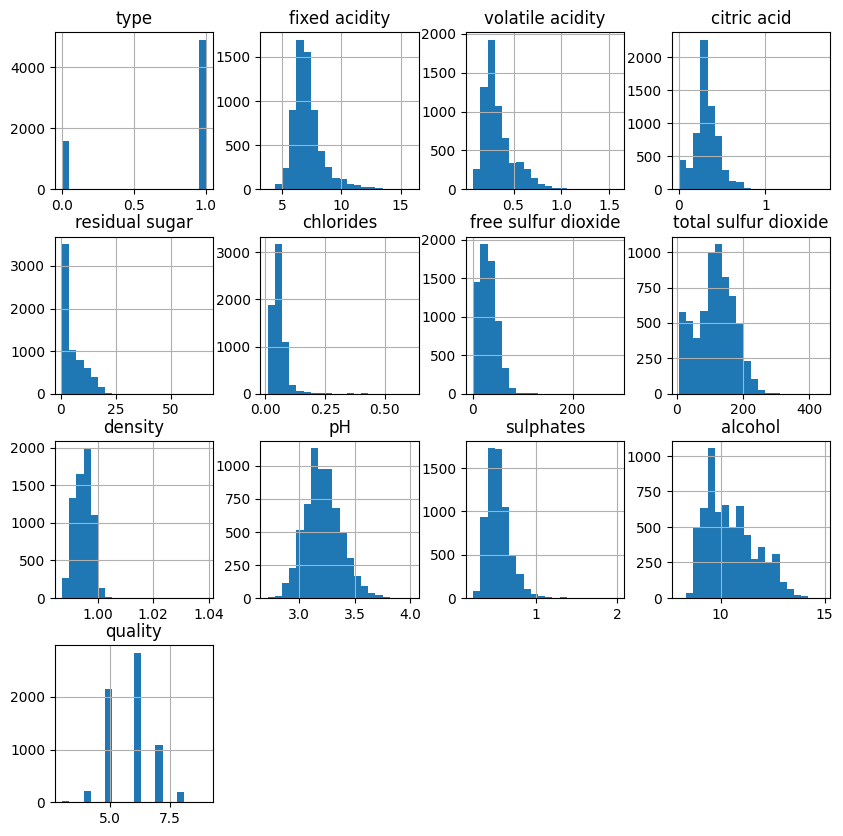

In [48]:
dataset.hist(bins=20, figsize=(10, 10))
plt.show()

In [49]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

AS ALL THE COLUMNS THAT ARE CONTAINING THE NULL VALUES ARE OF FLOAT64 TYPE, WE REPLACE NULL VALUES WITH MEAN PARAMETER OF THAT RESPECTIVE COLUMN.

In [50]:
dataset['fixed acidity'].fillna(dataset['fixed acidity'].mean(), inplace = True)
dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean(), inplace = True)
dataset['citric acid'].fillna(dataset['citric acid'].mean(), inplace = True)
dataset['residual sugar'].fillna(dataset['residual sugar'].mean(), inplace = True)
dataset['chlorides'].fillna(dataset['chlorides'].mean(), inplace = True)
dataset['pH'].fillna(dataset['pH'].mean(), inplace = True)
dataset['sulphates'].fillna(dataset['sulphates'].mean(), inplace = True)

In [51]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

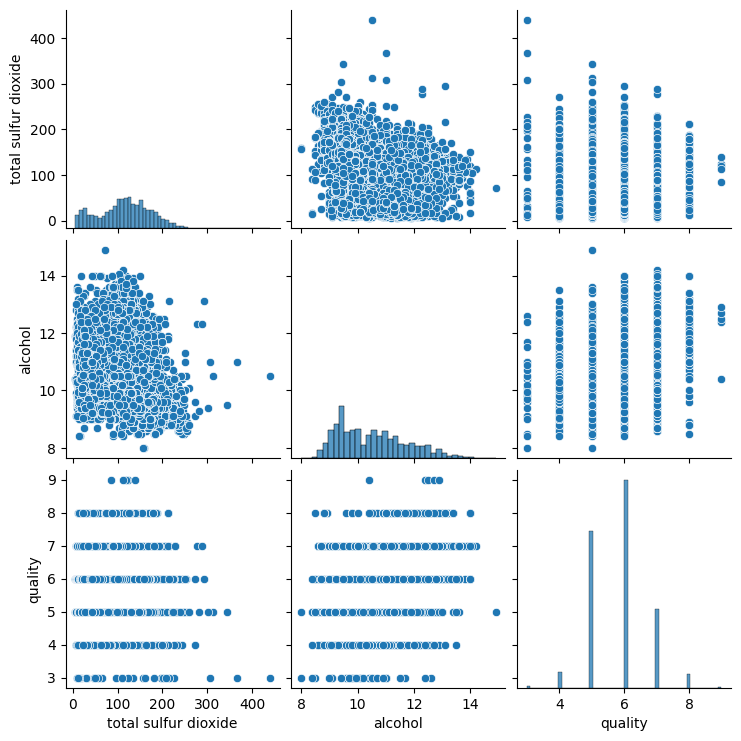

In [52]:
sns.pairplot(data = dataset, vars=['total sulfur dioxide','alcohol','quality'])
plt.show()

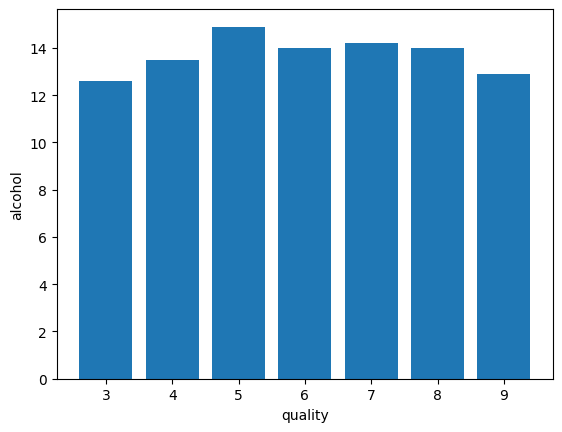

In [53]:
plt.bar(dataset['quality'], dataset['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

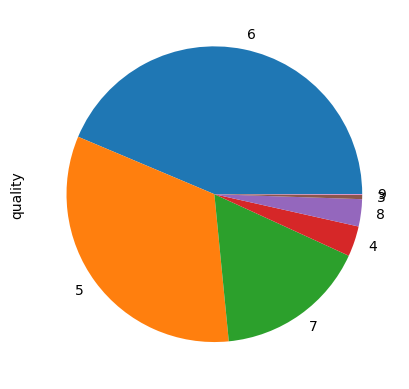

In [54]:
dataset.quality.value_counts(normalize=True).plot.pie()
plt.show()

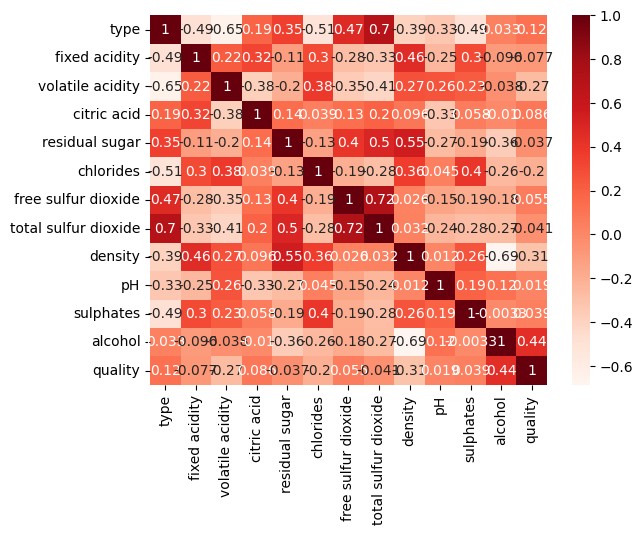

In [55]:
sns.heatmap(dataset.corr(), annot=True, cmap = 'Reds')
plt.show()

In [56]:
mean=dataset.quality.mean()
mean=int(mean)
mean

5

In [57]:
dataset['best quality'] = [1 if x > mean else 0 for x in dataset.quality]

NOW, WE SPLIT THE DATA INTO FEATURES AND PREDICT DATASETS, WHICH ARE FURTHUR CLASSIFIED INTO TEST AND TRAIN DATASET

In [58]:
X = dataset.drop(['quality', 'best quality'], axis=1)
y = dataset['best quality']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=42)

In [59]:
xtrain.shape

(5197, 12)

In [60]:
ytrain.shape

(5197,)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
prediction_train=model.predict(xtrain)
accuracy_train= accuracy_score(ytrain, prediction_train)

In [65]:
prediction_test=model.predict(xtest)
accuracy_test= accuracy_score(ytest, prediction_test)

In [66]:
accuracy_train

0.7342697710217433

In [67]:
accuracy_test

0.7323076923076923

In [68]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction_test, ytest))

[[271 151]
 [197 681]]


In [76]:
import pickle
pickle.dump(model,open('wine_quality_predition.pkl','wb'))

In [77]:
Model_log = pickle.load(open('wine_quality_predition.pkl','rb'))
Model_log

LogisticRegression()

In [78]:
Model_log.predict(xtest)

array([1, 1, 1, ..., 1, 1, 0])